# Example: KL-divergence nonnegative regression with random datasets
Solve the following problem
$$
\textrm{minimize}_{x\in R^n_+} \quad F(x):= D_{KL}(Ax, b) + \Psi(x)
$$
where $A\in R^{m\times n}_+$ and $b\in R^m_{++}$.

In [1]:
cd  C:\\github\accbpg

C:\github\accbpg


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14, 'font.family': 'serif'})
# matplotlib.rcParams.update({'text.usetex': True})

### Comparing BPG with line search and adaptive ABPG algorithms

In [19]:
import accbpg

# Generate a random instance of the Poisson linear inverse problem of size m by n
m = 1000
n = 100
fs, hs, Ls, x0s = accbpg.KL_nonneg_regr(m, n, noise=0.01, lamdaL1=0.001, normalizeA=True, randseed=1)

# Solve the problem using BPG w/o line seach and adaptive ABPG with gamma=2 (TSE), also with restart
xs00, Fs00, Gs00, _ = accbpg.BPG( fs, hs, Ls, x0s, maxitrs=5000, linesearch=False, verbskip=1000)
xsLS, FsLS, GsLS, _ = accbpg.BPG( fs, hs, Ls, x0s, maxitrs=5000, linesearch=True, ls_ratio=1.2, verbskip=1000)
xs20, Fs20, Gs20, _ = accbpg.ABPG(fs, hs, Ls, x0s, gamma=2.0, maxitrs=5000, theta_eq=True, restart=False, verbskip=1000)
xs20rs, Fs20rs, Gs20rs, _ = accbpg.ABPG(fs, hs, Ls, x0s, gamma=2.0, maxitrs=5000, theta_eq=True, restart=True, verbskip=1000)
xs2g, Fs2g, Gs2g, _, _, _ = accbpg.ABPG_gain(fs, hs, Ls, x0s, gamma=2, maxitrs=5000, G0=0.1, theta_eq=True, restart=False, verbskip=1000)
xs2grs, Fs2grs, Gs2grs, _, _, _ = accbpg.ABPG_gain(fs, hs, Ls, x0s, gamma=2, maxitrs=5000, G0=0.1, theta_eq=True, restart=True, restart_rule='f', verbskip=1000)


BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   3.079e-01   1.000e+00     0.0
  1000   1.287e-01   1.000e+00     0.4
  2000   1.280e-01   1.000e+00     0.7
  3000   1.279e-01   1.000e+00     1.1
  4000   1.278e-01   1.000e+00     1.4

BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   3.079e-01   1.000e+00     0.0
  1000   1.279e-01   5.787e-01     0.7
  2000   1.278e-01   4.823e-01     1.5
  3000   1.278e-01   4.019e-01     2.2
  4000   1.278e-01   4.019e-01     2.9

ABPG method for minimize_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)       theta        TSG       D(x+,y)     D(z+,z)     time
     0   3.079e-01   1.000e+00   1.000e+00   1.470e-01   1.470e-01     0.0
  1000   1.278e-01   1.992e-03   1.024e+00   4.764e-11   1.172e-05     0.5
  2000   1.278e-01   1.000e-03   9.888e-01   1.973e-12   1.995e-06     1.0
  3000   1.278e-01   1.000e-03   1.066e+00   5.484e-13   5.142e-07    

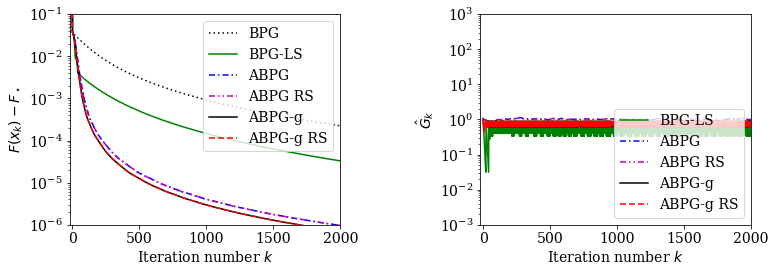

In [24]:
# Plot the objective gap and estimated gains for triangle scaling
plt.subplots(1, 2, figsize=(11, 4))

labels = [r"BPG", r"BPG-LS", r"ABPG", r"ABPG RS", r"ABPG-g", r"ABPG-g RS"]
styles = ['k:', 'g-', 'b-.', 'm-', 'k-', 'r--']
dashes = [[1,2], [], [4,2,1,2], [4,2,1,2,1,2], [], [4,2]]

ax1 = plt.subplot(1, 2, 1)
y_vals = [Fs00, FsLS, Fs20, Fs20rs, Fs2g, Fs2grs]
accbpg.plot_comparisons(ax1, y_vals, labels, x_vals=[], plotdiff=True, yscale="log", xlim=[-20, 2000], ylim=[1e-6, 1e-1], 
                        xlabel=r"Iteration number $k$", ylabel=r"$F(x_k)-F_\star$", legendloc="upper right", 
                        linestyles=styles, linedash=dashes)

ax2 = plt.subplot(1, 2, 2)
y_vals = [GsLS, Gs20, Gs20rs, Gs2g, Gs2grs]
accbpg.plot_comparisons(ax2, y_vals, labels[1:], x_vals=[], plotdiff=False, yscale="log", xlim=[-20, 2000], ylim=[1e-3, 1e3], 
                        xlabel=r"Iteration number $k$", ylabel=r'$\hat{G}_k$', legendloc="lower right", 
                        linestyles=styles[1:], linedash=dashes[1:])

plt.tight_layout(w_pad=4)
plt.show()

In [25]:
# Generate a random instance of the Poisson linear inverse problem of size m by n
m = 100
n = 1000
f, h, L, x0 = accbpg.KL_nonneg_regr(m, n, noise=0.01, lamdaL1=0.001, normalizeA=True, randseed=1)

# Solve the problem using BPG w/o line seach and adaptive ABPG with gamma=2 (TSE), also with restart
x00, F00, G00, _ = accbpg.BPG( f, h, L, x0, maxitrs=5000, linesearch=False, verbskip=1000)
xLS, FLS, GLS, _ = accbpg.BPG( f, h, L, x0, maxitrs=5000, linesearch=True, ls_ratio=1.2, verbskip=1000)
x20, F20, G20, _ = accbpg.ABPG(f, h, L, x0, gamma=2.0, maxitrs=5000, theta_eq=True, restart=False, verbskip=1000)
x20rs, F20rs, G20rs, _ = accbpg.ABPG(f, h, L, x0, gamma=2.0, maxitrs=5000, theta_eq=True, restart=True, verbskip=1000)
x2g, F2g, G2g, _, _, _ = accbpg.ABPG_gain(f, h, L, x0, gamma=2, maxitrs=5000, G0=0.1, theta_eq=True, restart=False, verbskip=1000)
x2grs, F2grs, G2grs, _, _, _ = accbpg.ABPG_gain(f, h, L, x0, gamma=2, maxitrs=5000, G0=0.1, theta_eq=True, restart=True, restart_rule='f', verbskip=1000)


BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   5.275e-01   1.000e+00     0.0
  1000   4.988e-01   1.000e+00     0.3
  2000   4.987e-01   1.000e+00     0.5
  3000   4.987e-01   1.000e+00     0.7
  4000   4.987e-01   1.000e+00     0.9

BPG_LS method for min_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)         Lk       time
     0   5.275e-01   1.000e+00     0.0
  1000   4.987e-01   4.823e-01     1.2
  2000   4.987e-01   3.349e-01     2.4

ABPG method for minimize_{x in C} F(x) = f(x) + Psi(x)
     k      F(x)       theta        TSG       D(x+,y)     D(z+,z)     time
     0   5.275e-01   1.000e+00   1.000e+00   2.689e-03   2.689e-03     0.0
  1000   4.987e-01   1.992e-03   9.989e-01   3.532e-11   8.910e-06     1.1
  2000   4.987e-01   1.000e-03   2.638e+00   1.344e-12   5.095e-07     2.2
  3000   4.987e-01   1.000e-03   5.136e+00   1.404e-13   2.734e-08     3.3
  4000   4.987e-01   1.000e-03  -7.840e+02  -6.766e-13   8.631e-10     4.

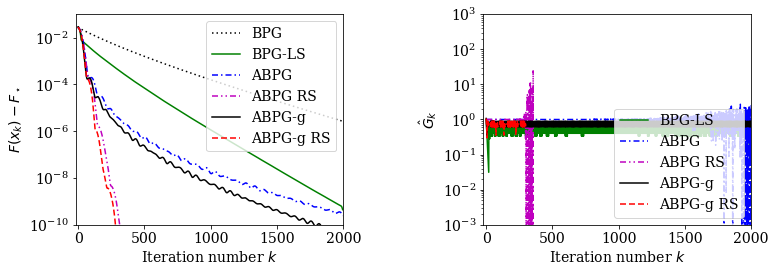

In [26]:
# Plot the objective gap and estimated gains for triangle scaling
plt.subplots(1, 2, figsize=(11, 4))

labels = [r"BPG", r"BPG-LS", r"ABPG", r"ABPG RS", r"ABPG-g", r"ABPG-g RS"]
styles = ['k:', 'g-', 'b-.', 'm-', 'k-', 'r--']
dashes = [[1,2], [], [4,2,1,2], [4,2,1,2,1,2], [], [4,2]]

ax1 = plt.subplot(1, 2, 1)
y_vals = [F00, FLS, F20, F20rs, F2g, F2grs]
accbpg.plot_comparisons(ax1, y_vals, labels, x_vals=[], plotdiff=True, yscale="log", xlim=[-20, 2000], ylim=[1e-10, 1e-1], 
                        xlabel=r"Iteration number $k$", ylabel=r"$F(x_k)-F_\star$", legendloc="upper right", 
                        linestyles=styles, linedash=dashes)

ax2 = plt.subplot(1, 2, 2)
y_vals = [GLS, G20, G20rs, G2g, G2grs]
accbpg.plot_comparisons(ax2, y_vals, labels[1:], x_vals=[], plotdiff=False, yscale="log", xlim=[-20, 2000], ylim=[1e-3, 1e3], 
                        xlabel=r"Iteration number $k$", ylabel=r"$\hat{G}_k$", legendloc="lower right", 
                        linestyles=styles[1:], linedash=dashes[1:])

plt.tight_layout(w_pad=4)
plt.show()